In [1]:
# CS559 Assignment1_Problem7_(2)
# Train iris using MLE
# Chenxu Wang
# 10457625

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
# Import iris data 
# The dataset contains a set of 150 records under five attributes:
# sepal length, sepal width, petal length, petal width and species
# three classes : 0: setosa; 1: versicolor; 2: virginica
# We choose the first 2 types of features: sepal length, sepal width
# Classify for two classes: virginica and non-virginica
data = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[data['data'], data['target']], 
                    columns= data['feature_names'] + ['target'])



In [4]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
# Simplify iris into 2 classes and 2 feature for next training
X = iris.iloc[:, :2].values
y = iris.iloc[:, 4].values
y = np.where(y == 2, 1, 0)

In [6]:
print(X)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [7]:
# Split data into testing and training by 3:7
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=8)

In [8]:
# Define a Sigmoid function 
# Input:
# z: theta[0] + X1xtheta[1]T+ X2xtheta[2]T
def sigmoid_func(z):
    return 1.0 / ( 1.0 + np.exp(-z))


In [9]:
# Define a cost function
# Input:
# X: nx2
# y: nx1
# Output:
# cost: 1x2
# error: nx2
def cost_function(X,y, theta):
    z = np.dot(X, theta[1:]) + theta[0]
    h = sigmoid_func(z) # nx2
    # m = 2
    # cost = -(1/m)*np.sum(y.dot(np.log(h))+((1 - y).dot(np.log(1-h)))) # 1x2
    # m can be ignored.
    cost = -y.dot(np.log(h)) - ((1 - y).dot(np.log(1-h))) # 1x2
    error = h - y # nx2
    return cost, error

In [10]:
# Define a SGD function
def LLGradient(X, y, theta, learning_rate, maxiter):
    # store costs for every iteration
    itercost = []
    
    for i in range(maxiter):
        cost, error = cost_function(X, y, theta)
        grad = X.T.dot(error) # 2x2
        theta[0] = theta[0] -learning_rate * error.sum()
        theta[1:] = theta[1:] - learning_rate * grad # 1x2
        
        itercost.append(cost)
        
    return itercost,theta

In [11]:
# Set parameters
theta = np.zeros(3)
learning_rate = 0.001
maxiter = 7000
# Run the model
cost,theta = LLGradient(X_train,y_train, theta, learning_rate, maxiter)

No handles with labels found to put in legend.


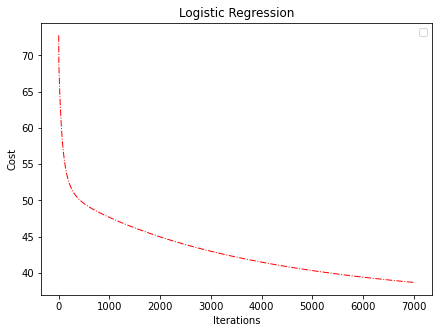

In [12]:
# Plot the cost descent line
fig = plt.figure(figsize=(7,5))
plt.plot(range(1, len(cost) + 1), cost,'-.r', LineWidth=1)
plt.title('Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='upper right')
plt.show()
#fig.savefig('The cost_of_Logistic_Regression.pdf', format='pdf', dpi=1200)



In [13]:
# Define the prediction function
def LLPredict(X,theta):
    z = np.dot(X, theta[1:]) + theta[0]
    pred = np.where(sigmoid_func(z) >= 0.5,1, 0)
    return pred # nx1

In [14]:
# Show the accuracy
def accur_func(X, y, theta):
    corr = 0
    predic = LLPredict(X, theta)
    for i in range(len(y)):
        if predic[i] == y[i]:
            corr += 1
    return corr/len(y)

In [15]:
accur_func(X_test, y_test, theta)

0.8

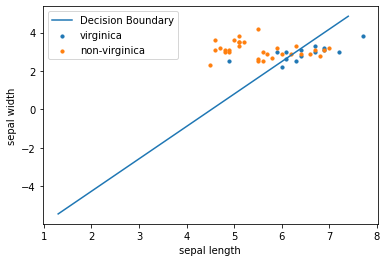

In [16]:
# Visualize the results by showing the trained classifier
# overlaid on the train/test data.
# filter out virginica
virginica = X_test[y_test == 1]
# filter out non_virginica
non_virginica = X_test[y_test ==0]

# plots
plt.scatter(virginica[:, 0], virginica[:, 1], s=10, label='virginica')
plt.scatter(non_virginica[:, 0], non_virginica[:, 1], s=10, label='non-virginica')


x_values = [np.min(X_train[:, 0] - 3), np.max(X_train[:, 1] + 3)]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()